# Assignment 7 

# Topic Modelling

Topic modeling is a technique to uncover hidden topics in large text collections. Key methods include LDA, NMF, and LSA. It helps in organizing, summarizing, and analyzing text data, with applications in document clustering, search engines, recommendations, and trend analysis. Challenges involve choosing the right number of topics, ensuring interpretability, managing large datasets, and evaluating topic quality. Despite these challenges, it provides valuable insights from textual data.

In [2]:
import pandas as pd
file = r"C:\Users\ASUS\Downloads\lyrics_raw.csv"
df = pd.read_csv(file)
df.head(20)


,track_name,artist,raw_lyrics,artist_verses
0,You Broke My Heart,Drake,"Yeah Yeah Oh, baby, don't go Don't go Look Loo...","Yeah\nYeah\nOh, baby, don't go\nDon't go\nLook..."
1,First Person Shooter (feat. J. Cole),Drake,"[Intro: J. Cole & Adonis] (Pew, pew-pew) First...",Big as the what? (Ah)\nBig as the what? (Mm)\n...
2,MELTDOWN (feat. Drake),Drake,[Intro: Drake] Yeah Tensions is definitely ris...,Yeah\nTensions is definitely rising\nT'd up ri...
3,Slime You Out (feat. SZA),Drake,I don't know I don't know what's wrong with yo...,I don't know\nI don't know what's wrong with y...
4,On The Radar Freestyle,Drake,"Yeah On The Radar, 2023 6 G-O-D and my broski ...","Yeah\nOn The Radar, \n G-O-D and my broski \nC..."
5,Evil Ways (feat. J. Cole),Drake,"Yeah (Oh, baby, be honest with yourself) Yeah ...","Yeah (Oh, baby, be honest with yourself)\nYeah..."
6,Search & Rescue,Drake,"(I-I'm) SADPONY Ayy (I-I'm), yeah BNYX [Choru...","(I-I'm)\nSADPONY\nAyy (I-I'm), yeah\nBNYX\nI n..."
7,The Shoe Fits,Drake,"Yeah Y'all might want to skip this one, this i...","Yeah\nY'all might want to skip this one, this ..."
8,Jimmy Cooks (feat. 21 Savage),Drake,"Just awaken shaken once again, so you know it'...","Just awaken shaken once again, so you know it'..."
9,Fair Trade (with Travis Scott),Drake,I don't understand why you blame me Just take ...,I don't understand why you blame me\nJust take...


In [4]:
print(df.index)


RangeIndex(start=0, stop=530, step=1)


In [5]:
for index in df.index:
    print(repr(df.loc[index, "artist_verses"][:400]))


"Yeah\nYeah\nOh, baby, don't go\nDon't go\nLook\nLook\nMy notepad caught many bodies\nScreenshots solved plenty problems\nVoice notes bagged plenty hotties\nCan't just talk to me like anybody\nCan't just talk to me like anybody\nMan, you bitches know that I'm a somebody\nAnd lil' baby bad, she got a Jung body\nYeah, yeah, yeah, yeah\nBunch of feelings I just couldn't shake\nDisrespect that I just shouldn't take\nY"
"Big as the what? (Ah)\nBig as the what? (Mm)\nBig as the what? (Ayy)\nBig as the Super Bowl\nBut the difference is it's just two guys playin' shit that they did in the studio\nNiggas usually send they verses back to me and they be terrible, just like a two-year-old\nI love a dinner with some fine women when they start debatin' about who the G.O.A.T.\nI'm like go on 'head, say it then, who the G.O.A.T.?\nW"
"Yeah\nTensions is definitely rising\nT'd up right now\nT time, T time\nT time, T time, T time\nTeatime like I got a cup of this shit\nTee time like golf at a quarter to 

In [7]:
import re
df["paragraphs"] = df["artist_verses"].map(lambda text: re.split('\.\s*\n', text))
df["number_of_paragraphs"] = df["paragraphs"].map(len)


In [8]:
pip install spacy

The code uses TfidfVectorizer from scikit-learn to convert text documents into TF-IDF vectors. It imports stop words from SpaCy, initializes the vectorizer to exclude these stop words and to filter out terms appearing in fewer than 5 documents or more than 70% of documents. It then fits and transforms the 'artist_verses' column of a DataFrame df, producing a sparse matrix of TF-IDF features.

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

# Convert set of stop words to a list
stop_words_list = list(stopwords)

# Initialize the TfidfVectorizer with stop words
tfidf_text_vectorizer = TfidfVectorizer(stop_words=stop_words_list, min_df=5, max_df=0.7)

# Fit and transform the data
tfidf_text_vectors = tfidf_text_vectorizer.fit_transform(df['artist_verses'])
tfidf_text_vectors.shape


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


(530, 2966)

In [12]:
# flatten the paragraphs keeping the artist
paragraph_df = pd.DataFrame([{ "paragraphs": paragraph, "artist": artist } 
                               for paragraphs, artist in zip(df["paragraphs"], df["artist"]) 
                                    for paragraph in paragraphs if paragraph])
paragraph_df.head(10)


,paragraphs,artist
0,"Yeah\nYeah\nOh, baby, don't go\nDon't go\nLook...",Drake
1,Big as the what? (Ah)\nBig as the what? (Mm)\n...,Drake
2,"I'm like go on 'head, say it then, who the G.O...",Drake
3,Yeah\nTensions is definitely rising\nT'd up ri...,Drake
4,I don't know\nI don't know what's wrong with y...,Drake
5,(ix)\nYou bitches really get carried away\nMak...,Drake
6,"Yeah\nOn The Radar, \n G-O-D and my broski \nC...",Drake
7,"Yeah (Oh, baby, be honest with yourself)\nYeah...",Drake
8,"(I-I'm)\nSADPONY\nAyy (I-I'm), yeah\nBNYX\nI n...",Drake
9,"Yeah\nY'all might want to skip this one, this ...",Drake


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

# Convert set of stop words to a list
stop_words_list = list(stopwords)

# Initialize the TfidfVectorizer with stop words
tfidf_para_vectorizer = TfidfVectorizer(stop_words=stop_words_list, min_df=5, max_df=0.7)

# Fit and transform the data
tfidf_para_vectors = tfidf_para_vectorizer.fit_transform(paragraph_df["paragraphs"])
tfidf_para_vectors.shape


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


(623, 3202)

The code uses Non-negative Matrix Factorization (NMF) from scikit-learn to extract 10 latent topics from TF-IDF vectors of text data. It generates W_text_matrix for document-topic distribution and H_text_matrix for topic-term distribution.
from sklearn.decomposition import NMF

In [16]:
from sklearn.decomposition import NMF

nmf_text_model = NMF(n_components=10, random_state=42)
W_text_matrix = nmf_text_model.fit_transform(tfidf_text_vectors)
H_text_matrix = nmf_text_model.components_

In [17]:
def display_topics(model, features, no_top_words=5):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1]  # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print("  %s (%2.2f)" % (features[largest[i]], abs(words[largest[i]] * 100.0 / total)))

# Call display_topics with corrected argument
display_topics(nmf_text_model, tfidf_text_vectorizer.get_feature_names_out())


Topic 00
  niggas (1.61)
  nigga (1.49)
  life (0.93)
  die (0.85)
  thug (0.68)

Topic 01
  yeah (9.07)
  bitch (0.76)
  ooh (0.76)
  ayy (0.69)
  woo (0.67)

Topic 02
  la (23.74)
  da (2.97)
  na (2.48)
  freaky (1.90)
  hail (1.57)

Topic 03
  uh (1.14)
  fuck (0.99)
  bitch (0.99)
  shit (0.77)
  em (0.71)

Topic 04
  man (2.55)
  wanna (1.22)
  girl (0.90)
  tryna (0.70)
  ain (0.67)

Topic 05
  oh (10.53)
  ooh (1.20)
  higher (1.03)
  hey (0.90)
  girls (0.90)

Topic 06
  ft (13.50)
  remix (1.96)
  lil (1.60)
  feat (1.46)
  kanye (1.09)

Topic 07
  woah (11.76)
  okay (1.58)
  ayy (1.50)
  big (1.29)
  girls (1.09)

Topic 08
  love (4.11)
  baby (1.24)
  need (1.15)
  cause (0.77)
  find (0.59)

Topic 09
  hol (15.65)
  ayy (4.30)
  bitch (3.38)
  sit (2.26)
  humble (2.21)


# Now selecting different 10 topics

In [18]:
nmf_para_model = NMF(n_components=10, random_state=42)
W_para_matrix = nmf_para_model.fit_transform(tfidf_para_vectors)
H_para_matrix = nmf_para_model.components_

# Extract feature names from the vocabulary of TfidfVectorizer
feature_names = tfidf_para_vectorizer.get_feature_names_out()

# Display topics
display_topics(nmf_para_model, feature_names)


Topic 00
  don (1.39)
  man (1.32)
  love (1.06)
  know (1.03)
  wanna (1.00)

Topic 01
  pac (47.23)
  love (1.87)
  ghetto (1.70)
  tears (1.69)
  easy (1.67)

Topic 02
  ft (12.23)
  remix (1.54)
  le (1.24)
  lil (1.08)
  de (0.71)

Topic 03
  yeah (8.05)
  bitch (1.03)
  got (0.78)
  ooh (0.70)
  woo (0.66)

Topic 04
  feat (19.19)
  outlawz (2.26)
  eminem (1.80)
  fatal (1.38)
  dogg (1.28)

Topic 05
  niggas (1.27)
  nigga (1.20)
  shit (0.84)
  fuck (0.72)
  ain (0.57)

Topic 06
  oh (8.55)
  ooh (1.35)
  uh (1.12)
  ah (1.05)
  baby (1.00)

Topic 07
  woah (11.26)
  ayy (1.66)
  okay (1.48)
  big (1.46)
  ah (1.16)

Topic 08
  la (19.82)
  da (2.13)
  na (1.75)
  freaky (1.42)
  mary (1.28)

Topic 09
  hol (16.33)
  bitch (3.49)
  ayy (2.70)
  sit (1.99)
  humble (1.86)


# Determining the topic sizes

In [19]:
W_text_matrix.sum(axis=0)/W_text_matrix.sum()*100.0

array([15.30320652, 15.39561305,  3.42764293, 14.93695072, 12.73028362,
        8.50663408,  3.85130689,  6.92511117, 14.59802428,  4.32522674])

In [20]:
W_para_matrix.sum(axis=0)/W_para_matrix.sum()*100.0


array([19.76867209,  8.39249187,  6.20566041, 14.75267459,  5.89694183,
       22.25326216,  8.42004547,  5.35026565,  4.49392293,  4.46606301])

In [22]:
print(paragraph_df.columns)


Index(['paragraphs', 'artist'], dtype='object')


In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

# Convert set of stop words to a list
stop_words_list = list(stopwords)

# Initialize CountVectorizer with stop words
count_para_vectorizer = CountVectorizer(stop_words=stop_words_list, min_df=5, max_df=0.7)

# Fit and transform the data
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_df["paragraphs"])
count_para_vectors.shape

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


(623, 3202)

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

# Convert set of stop words to a list
stop_words_list = list(stopwords)

# Initialize CountVectorizer with stop words
count_para_vectorizer = CountVectorizer(stop_words=stop_words_list, min_df=5, max_df=0.7)

# Fit and transform the data
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_df["paragraphs"])
count_para_vectors.shape


(623, 3202)

In [26]:
from sklearn.decomposition import LatentDirichletAllocation

lda_para_model = LatentDirichletAllocation(n_components = 10, random_state=42)
W_lda_para_matrix = lda_para_model.fit_transform(count_para_vectors)
H_lda_para_matrix = lda_para_model.components_


In [27]:
display_topics(lda_para_model, count_para_vectorizer.get_feature_names_out())



Topic 00
  ft (4.13)
  feat (3.73)
  lil (1.38)
  love (1.16)
  remix (1.12)

Topic 01
  hol (4.04)
  ah (2.71)
  bitch (2.58)
  ayy (2.37)
  come (2.29)

Topic 02
  got (1.19)
  don (1.14)
  god (1.02)
  uh (1.01)
  shit (0.89)

Topic 03
  don (2.60)
  know (2.18)
  love (2.04)
  got (1.66)
  oh (1.60)

Topic 04
  got (3.20)
  ya (1.95)
  better (1.49)
  fuck (1.32)
  days (1.09)

Topic 05
  know (2.15)
  niggas (1.86)
  ain (1.67)
  yeah (1.62)
  don (1.50)

Topic 06
  yeah (7.45)
  got (2.31)
  shit (2.25)
  woah (2.11)
  bitch (2.11)

Topic 07
  la (10.46)
  ft (9.87)
  le (1.95)
  de (1.34)
  freestyle (0.84)

Topic 08
  man (4.49)
  don (3.01)
  got (2.28)
  wanna (1.51)
  know (1.47)

Topic 09
  uh (2.36)
  na (2.36)
  nas (2.11)
  oh (1.77)
  don (1.60)


In [28]:
W_lda_para_matrix.sum(axis=0)/W_lda_para_matrix.sum()*100.0


array([ 7.32657515,  4.62567169, 13.11387376, 23.49958425,  5.40923221,
       18.38678634,  9.57813287,  3.1209619 , 11.739873  ,  3.19930883])

In [29]:
pip install pyldavis

Note: you may need to restart the kernel to use updated packages.


In [30]:
import pyLDAvis

# Assuming you have already trained your LDA model
# lda_para_model = LatentDirichletAllocation(...)
# count_para_vectors = ...  # Document-term matrix from CountVectorizer
# count_para_vectorizer = ...  # CountVectorizer object

# Transform the data using the LDA model
lda_topics = lda_para_model.transform(count_para_vectors)

# Assuming you have the vocabulary and term frequency from your CountVectorizer
vocab = count_para_vectorizer.get_feature_names_out()
term_frequency = count_para_vectors.sum(axis=0).tolist()[0]

# Convert lda_topics to the format expected by pyLDAvis
topic_term_dists = lda_para_model.components_
doc_topic_dists = lda_topics
doc_lengths = (count_para_vectors != 0).sum(axis=1).A1
term_frequency = count_para_vectors.sum(axis=0).tolist()[0]

# Prepare the data for visualization
lda_display_data = pyLDAvis.prepare(topic_term_dists, doc_topic_dists, doc_lengths, vocab, term_frequency, sort_topics=False)

# Display the visualization
pyLDAvis.display(lda_display_data)


In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

def wordcloud_topics(model, features, no_top_words=40):
    for topic, words in enumerate(model.components_):
        size = {}
        largest = words.argsort()[::-1] # invert sort order
        for i in range(0, no_top_words):
            size[features[largest[i]]] = abs(words[largest[i]])
        wc = WordCloud(background_color="white", max_words=100, width=960, height=540)
        wc.generate_from_frequencies(size)
        plt.figure(figsize=(12,12))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")
        # if you don't want to save the topic model, comment the next line
        plt.savefig(f'topic{topic}.png')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3528\3253276570.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


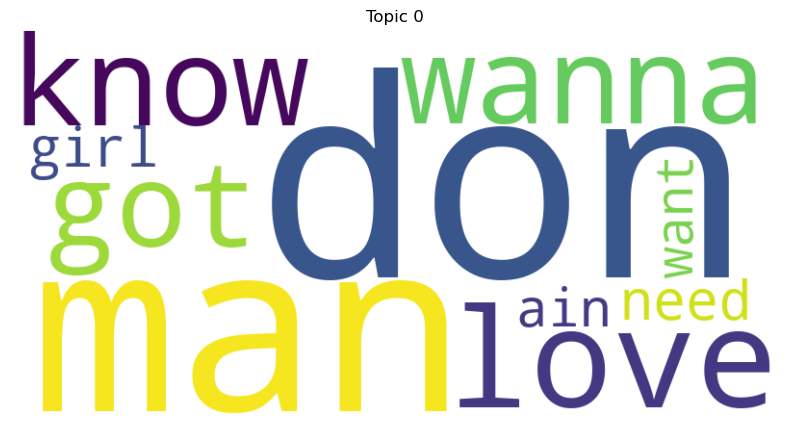

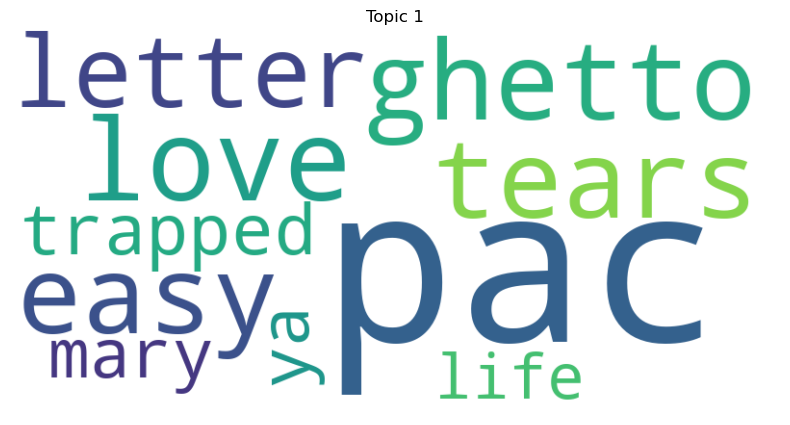

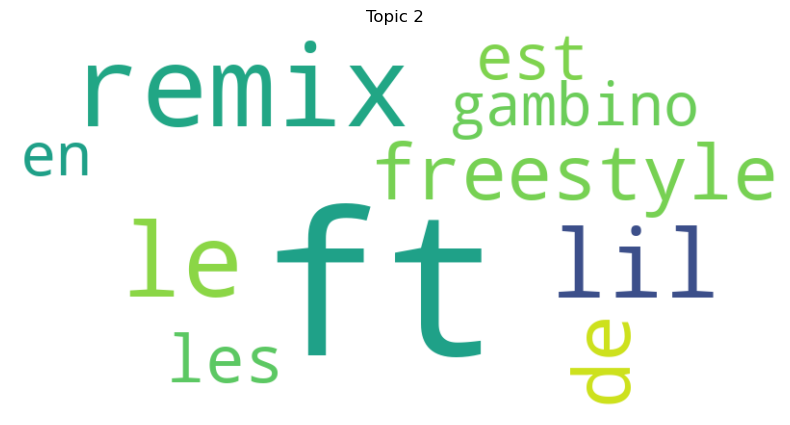

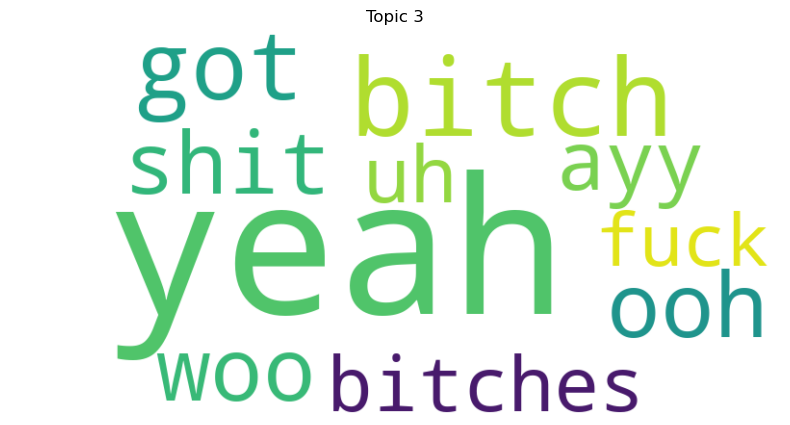

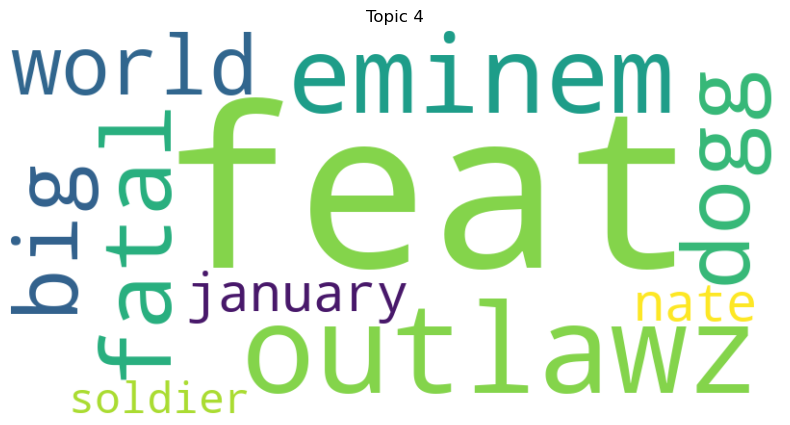

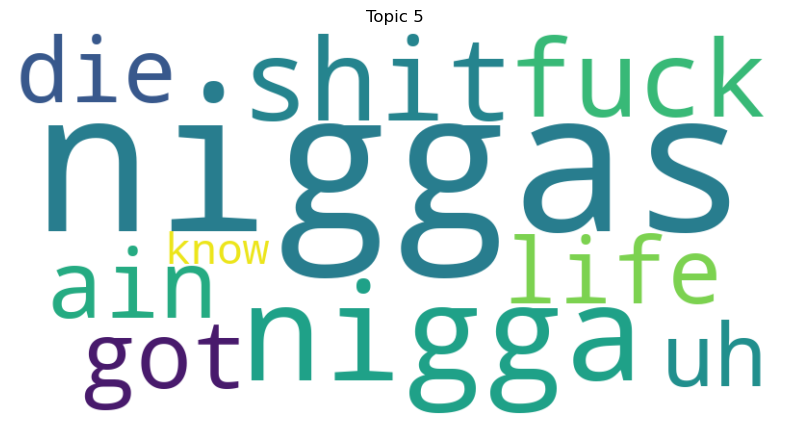

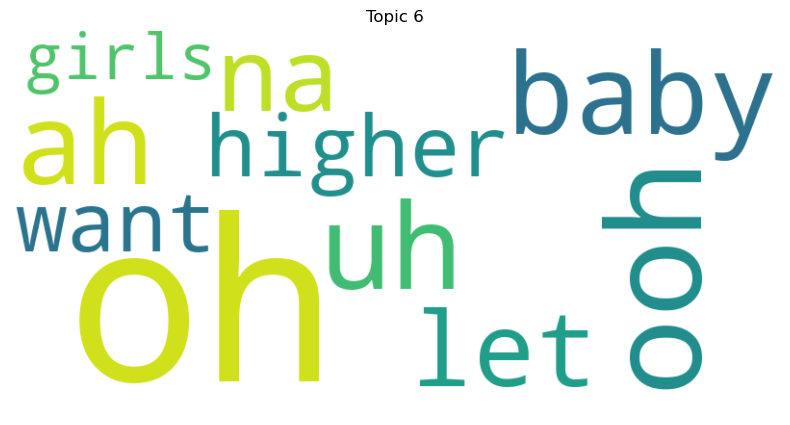

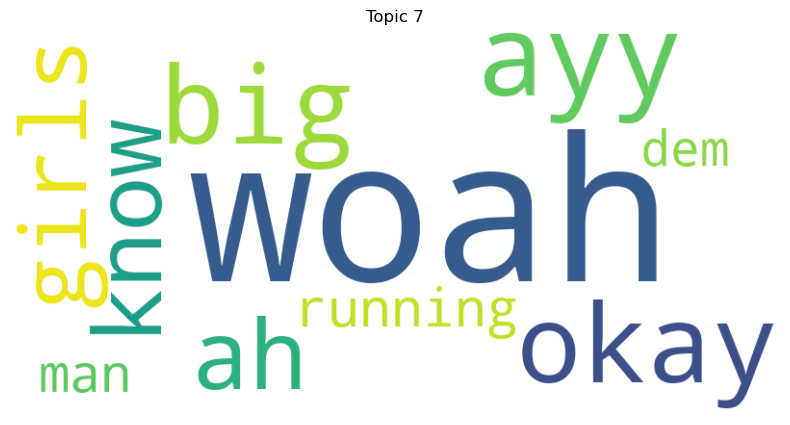

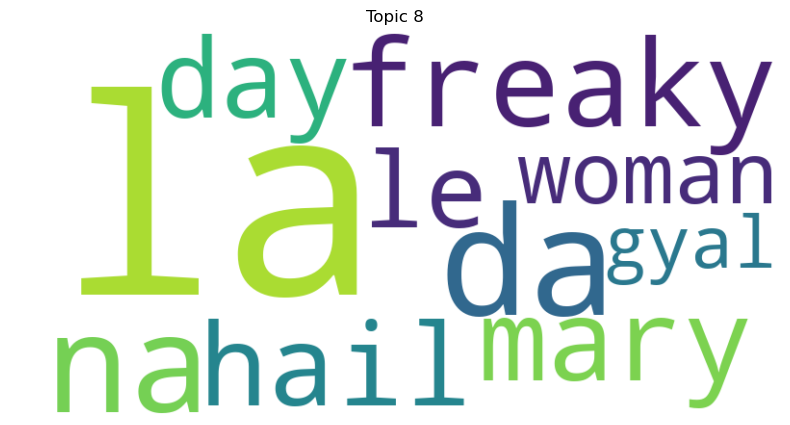

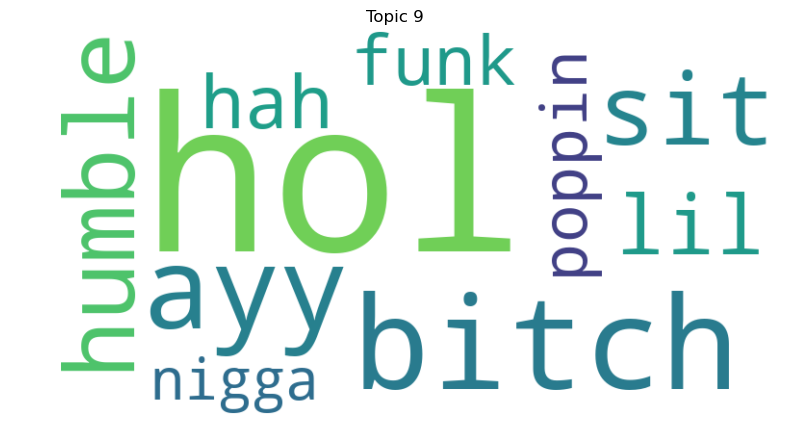

In [32]:
def wordcloud_topics(model, feature_names, num_words=10):
    # Initialize an empty dictionary to store topic words and their weights
    topic_words = {}

    # Iterate over each topic in the model
    for topic_idx, topic in enumerate(model.components_):
        # Get the top words for the current topic
        top_features_ind = topic.argsort()[:-num_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]

        # Store the topic words and their weights in the dictionary
        topic_words[topic_idx] = dict(zip(top_features, topic[top_features_ind]))

        # Create and display the word cloud for the current topic
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words[topic_idx])
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Topic {topic_idx}')
        plt.axis('off')
        plt.show()

# Assuming you have already trained your NMF model and TF-IDF vectorizer
# nmf_para_model = NMF(...)
# tfidf_para_vectorizer = TfidfVectorizer(...)

# Generate word clouds for topics
wordcloud_topics(nmf_para_model, tfidf_para_vectorizer.get_feature_names_out())

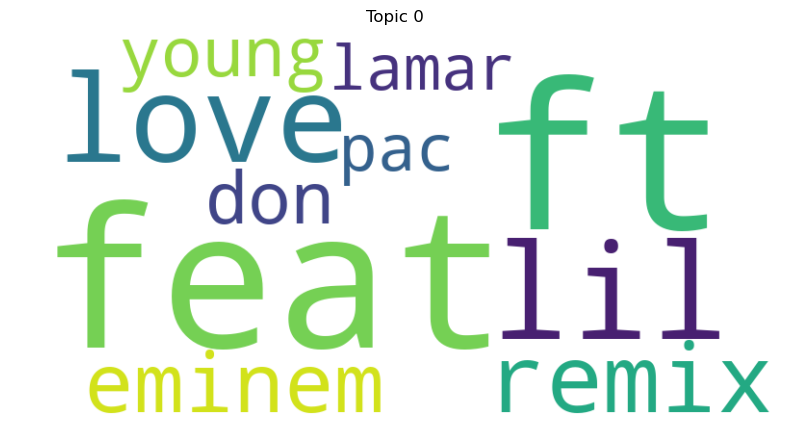

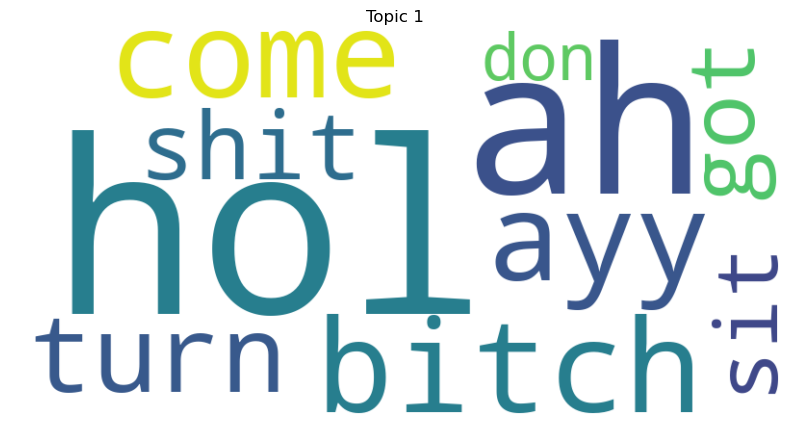

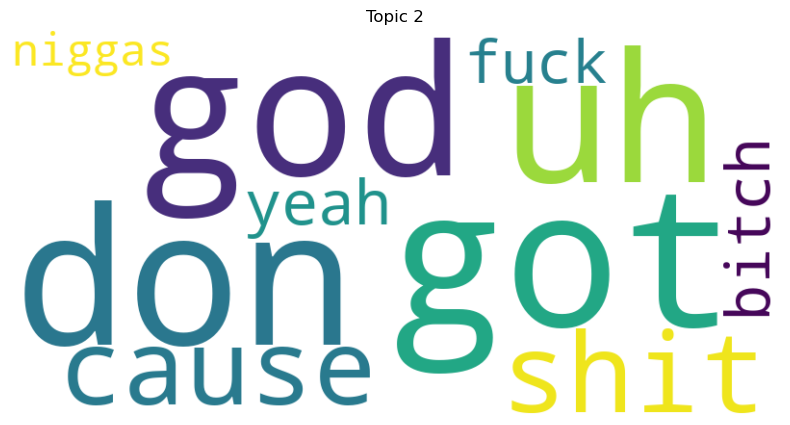

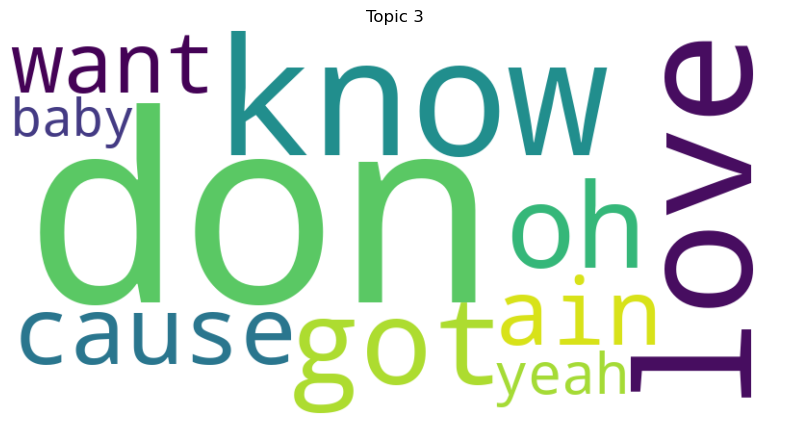

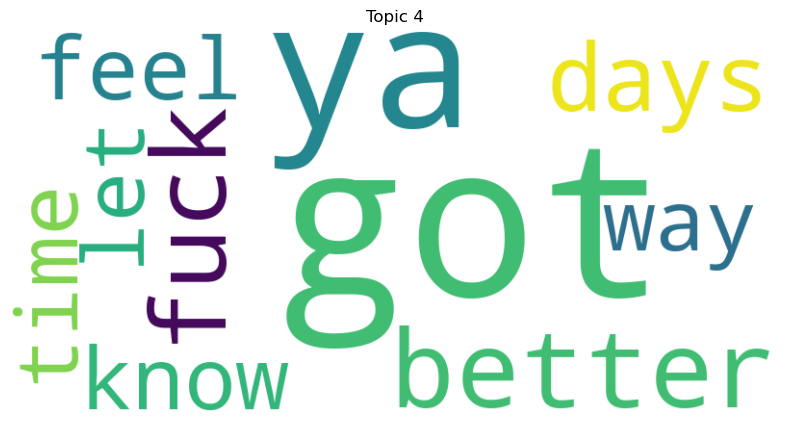

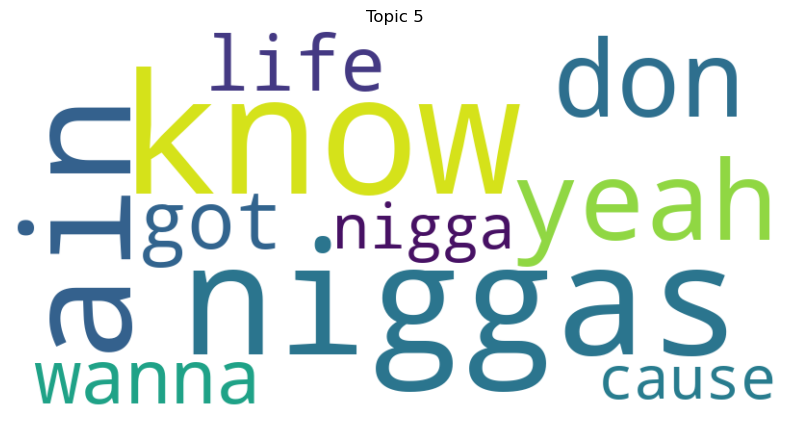

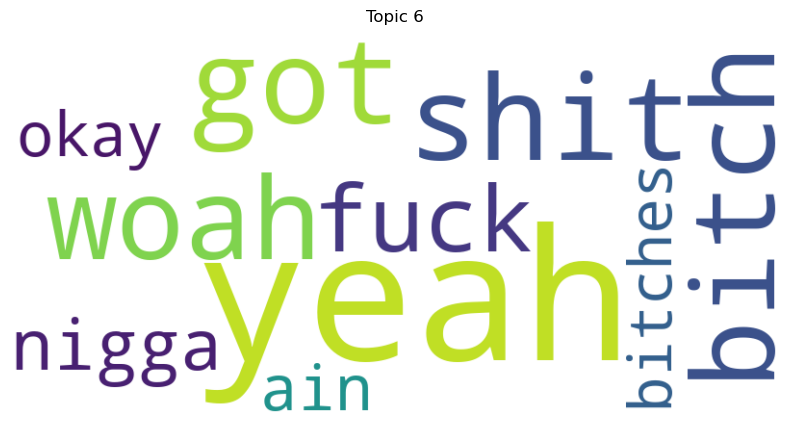

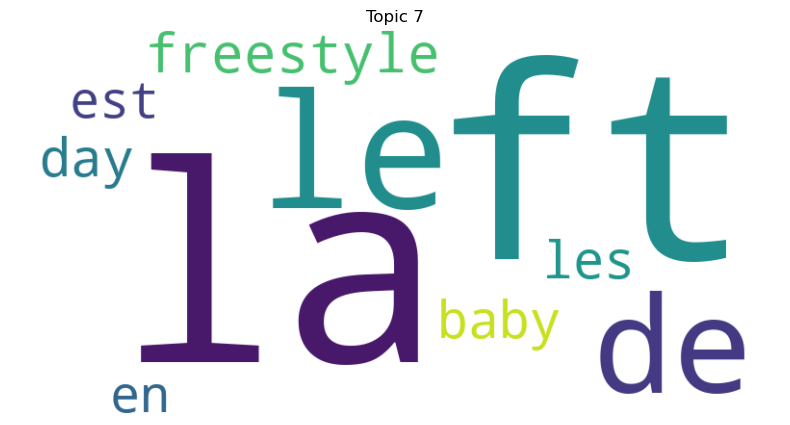

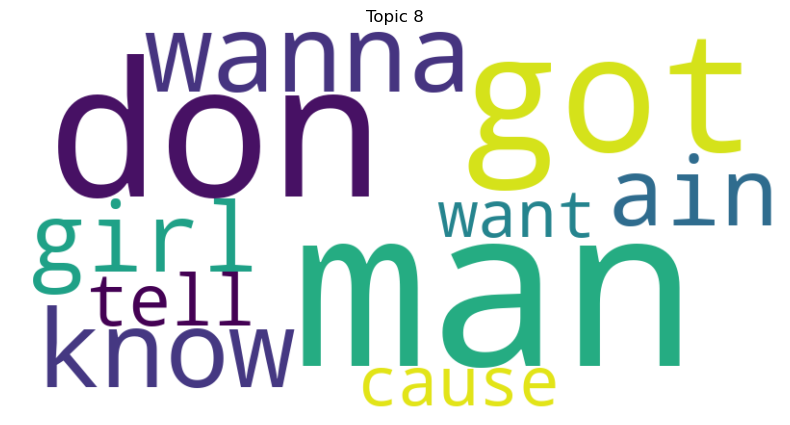

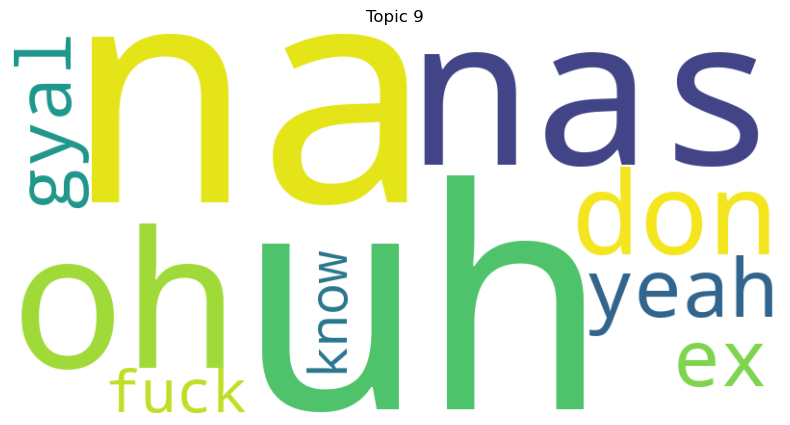

In [33]:
# Assuming you have already trained your LDA model and CountVectorizer
# lda_para_model = LatentDirichletAllocation(...)
# count_para_vectorizer = CountVectorizer(...)

# Generate word clouds for topics
wordcloud_topics(lda_para_model, count_para_vectorizer.get_feature_names_out())

In [34]:
topic_names = []
voc = tfidf_para_vectorizer.get_feature_names_out()
for topic in nmf_para_model.components_:
    important = topic.argsort()
    top_words = [voc[i] for i in important[-2:]]
    topic_name = " ".join(top_words)
    topic_names.append("Topic " + topic_name)

# Seperating data by year

In [36]:
from tqdm.auto import tqdm
import numpy as np
artist_data = []
for artist in tqdm(np.unique(np.unique(paragraph_df["artist"]))):
    W_artist = nmf_para_model.transform(tfidf_para_vectors[np.array(paragraph_df["artist"] == artist)])
    artist_data.append([artist] + list(W_artist.sum(axis=0)/W_artist.sum()*100.0))


C:\Users\ASUS\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
C:\Users\ASUS\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
C:\Users\ASUS\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
C:\Users\ASUS\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Pleas

  0%|          | 0/11 [00:00<?, ?it/s]

# Depicting the artist chart

<Axes: xlabel='artist'>

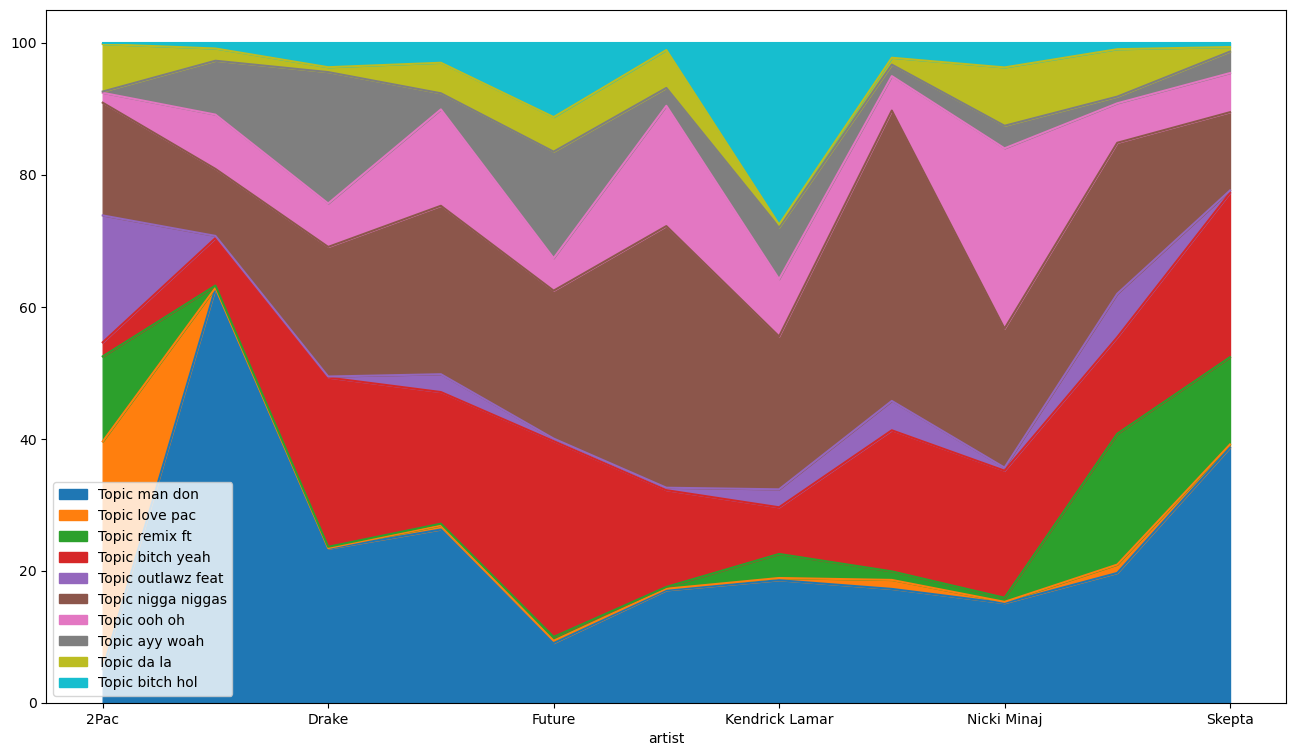

In [37]:
import matplotlib.pyplot as plt
df_artist = pd.DataFrame(artist_data, columns=["artist"] + topic_names).set_index("artist")
df_artist.plot.area(figsize=(16,9))
